# Tranfer Learnning to Flower Recognition using PyTorch üî•
This dataset contains labeled 4242 images of flowers.


### Content
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Data
You can download data from: [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import random

def create_datasets(base_dir, output_dir, train_ratio=0.7, val_ratio=0.2):
    # Crear directorios principales en la ubicaci√≥n de salida
    datasets = ['train', 'val', 'test']
    output_path = os.path.join(base_dir, output_dir)
    os.makedirs(output_path, exist_ok=True)

    for dataset in datasets:
        os.makedirs(os.path.join(output_path, dataset), exist_ok=True)

    # Lista de subcarpetas de flores en el directorio base
    flower_types = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # Iterar sobre cada subcarpeta de tipo de flor
    for flower_type in flower_types:
        flower_dir = os.path.join(base_dir, flower_type)
        # Crear directorios para cada tipo de flor en train, val y test
        for dataset in datasets:
            os.makedirs(os.path.join(output_path, dataset, flower_type), exist_ok=True)

        # Lista de im√°genes en la subcarpeta
        images = [f for f in os.listdir(flower_dir) if os.path.isfile(os.path.join(flower_dir, f))]
        random.shuffle(images)

        # N√∫mero de im√°genes para cada conjunto
        total_images = len(images)
        train_end = int(train_ratio * total_images)
        val_end = train_end + int(val_ratio * total_images)

        # Dividir im√°genes en train, val y test
        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]

        # Mover im√°genes a los directorios correspondientes
        for img in train_images:
            shutil.copy(os.path.join(flower_dir, img), os.path.join(output_path, 'train', flower_type, img))
        for img in val_images:
            shutil.copy(os.path.join(flower_dir, img), os.path.join(output_path, 'val', flower_type, img))
        for img in test_images:
            shutil.copy(os.path.join(flower_dir, img), os.path.join(output_path, 'test', flower_type, img))

# Configuraci√≥n de rutas
base_dir = '/content/drive/My Drive/descomprimido/flowers'
output_dir = '/content/drive/My Drive/descomprimido/dataset'

# Crear datasets
create_datasets(base_dir, output_dir)

# **EXPLORACI√ìN DE CONJUNTO DE DATOS**


---


Para definir el n√∫mero de clases, los nombres de las clases y el n√∫mero de im√°genes para cada una de las carpetas de entrenamiento, validaci√≥n y prueba:

1.   Obtener la lista de clases a partir de las subcarpetas en la carpeta de entrenamiento (`train`).
2.   Contar el n√∫mero de im√°genes en cada subcarpeta de entrenamiento para determinar el n√∫mero de im√°genes por clase.


In [ ]:
import os
dataset_path = '/content/drive/My Drive/descomprimido/dataset'
# Obtener la lista de clases a partir de las subcarpetas en la carpeta de entrenamiento
train_classes = [d for d in os.listdir(os.path.join(dataset_path, 'train')) if os.path.isdir(os.path.join(dataset_path, 'train', d))]

# N√∫mero de clases
num_classes = len(train_classes)
print("N√∫mero de clases:", num_classes)

# Nombre de las clases
print("Nombre de las clases:", train_classes)

# N√∫mero de im√°genes por clase en la carpeta de entrenamiento
num_images_train = {}
for cls in train_classes:
    num_images_train[cls] = len(os.listdir(os.path.join(dataset_path, 'train', cls)))

print("N√∫mero de im√°genes por clase en la carpeta de entrenamiento:")
for cls, num_images in num_images_train.items():
    print(f"- {cls}: {num_images}")

# N√∫mero de im√°genes por clase en la carpeta de validacion
num_images_val = {}
for cls in train_classes:
    num_images_val[cls] = len(os.listdir(os.path.join(dataset_path, 'val', cls)))

print("N√∫mero de im√°genes por clase en la carpeta de validaci√≥n:")
for cls, num_images in num_images_val.items():
    print(f"- {cls}: {num_images}")


N√∫mero de clases: 5
Nombre de las clases: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
N√∫mero de im√°genes por clase en la carpeta de entrenamiento:
- daisy: 687
- dandelion: 962
- rose: 700
- sunflower: 659
- tulip: 896
N√∫mero de im√°genes por clase en la carpeta de validaci√≥n:
- daisy: 269
- dandelion: 378
- rose: 282
- sunflower: 261
- tulip: 357


Para ver una muestra de cada una de las clases en el conjunto de entrenamiento, se puede cargar una imagen de cada clase y mostrarla.

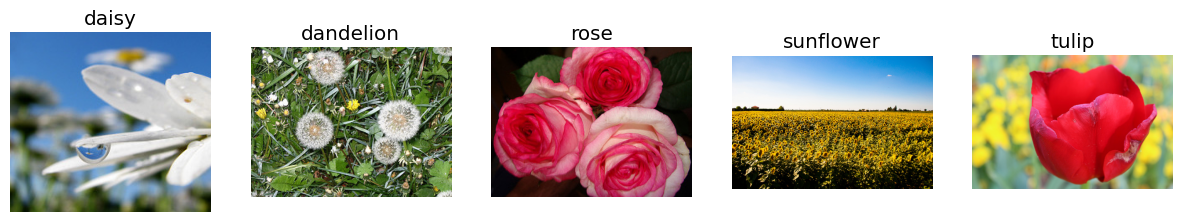

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta de la carpeta dataset en Google Drive
dataset_path = '/content/drive/My Drive/descomprimido/dataset'

# Obtener la lista de clases a partir de las subcarpetas en la carpeta de entrenamiento
train_classes = [d for d in os.listdir(os.path.join(dataset_path, 'train')) if os.path.isdir(os.path.join(dataset_path, 'train', d))]

# Mostrar una muestra de cada clase
plt.figure(figsize=(15, 5))
for i, cls in enumerate(train_classes, start=1):
    # Obtener la ruta de la primera imagen de la clase
    img_name = os.listdir(os.path.join(dataset_path, 'train', cls))[0]
    img_path = os.path.join(dataset_path, 'train', cls, img_name)

    # Cargar la imagen
    img = Image.open(img_path)

    # Mostrar la imagen
    plt.subplot(1, len(train_classes), i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.show()


## **SELECCI√ìN DE MODELO DE CLASIFICACI√ìN**


---


Para el entrenamiento, usaremos una red ResNet18 previamente entrenada y la ajustaremos en nuestro conjunto de datos.

El siguiente c√≥digo permite construir un modelo de CNN utilizando la arquitectura ResNet-18 con la opci√≥n de cargar pesos pre-entrenados

In [ ]:
import torch.nn as nn
from torchvision import models
from torchvision.models import ResNet18_Weights

num_classes = 5

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(in_features=512, out_features=num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.nn as nn
from torchvision import models
from torchvision.models import ResNet18_Weights

num_classes = 5

def build_model(pretrained=True, fine_tune=True, num_classes= 5):
    if pretrained:
        print('[INFO]: Loading pre-trained weights')
        model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
    else:
        print('[INFO]: Not loading pre-trained weights')
        model = models.resnet18(weights=None)

    if fine_tune:
        print('[INFO]: Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    elif not fine_tune:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False
    # Cambia la capa de clasificai√≥n final
    model.fc = nn.Linear(in_features=512, out_features=num_classes)
    return model

El n√∫mero de clases se ha cambiado de 1000 (para ImageNet) a 5 (para nuestro conjunto de datos).

**Transfer Learning (Aprendizaje por Transferencia):**
* En el transfer learning, se utiliza un modelo pre-entrenado en una tarea relacionada y se transfieren sus conocimientos aprendidos a una nueva tarea. Esto implica tomar un modelo que ha sido entrenado en un conjunto de datos grande y general, como ImageNet, y aplicarlo a una tarea diferente pero relacionada, como la clasificaci√≥n de im√°genes m√©dicas.
* Durante el transfer learning, se suelen mantener fijas las capas de la red neuronal convolucional (CNN) pre-entrenada y se reemplaza √∫nicamente la capa de salida (o se agregan nuevas capas) para adaptarse a la nueva tarea.
* El objetivo principal del transfer learning es aprovechar los conocimientos previos aprendidos por el modelo pre-entrenado en la tarea original para acelerar y mejorar el rendimiento en la nueva tarea.



# **PREPARACI√ìN DE DATOS**


---



# **DEFINICI√ìN DE TRANSFORMACIONES**

Para mejorar la capacidad del modelo para generalizar a datos nuevos, se aplican transformaciones de aumento de datos, como el transpuesta horizontal, la rotaci√≥n, el recorte aleatorio, para exponerlo a una variedad m√°s amplia de ejemplos durante el entrenamiento.
Los aumentos ayudan a reducir el sobreajuste y tambi√©n nos permiten entrenar durante m√°s tiempo.
Aparte de eso, tanto para el conjunto de entrenamiento como para el de validaci√≥n, usaremos los valores de normalizaci√≥n de ImageNet. Esto se debe a que estamos ajustando un modelo ResNet18 previamente entrenado.

In [ ]:
import torchvision.transforms as transforms

# Transformaciones para las im√°genes de entrenamiento
train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(35),
        transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])

# Transformaciones para las im√°genes de validaci√≥n
valid_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])

# Transformaciones para las im√°genes de prueba
test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])

Aqu√≠ est√° una explicaci√≥n de cada una de las transformaciones que has aplicado:

* **Resize((224, 224)):** Esto redimensiona las im√°genes a un tama√±o de 224x224. Esta es una dimensi√≥n com√∫nmente utilizada en arquitecturas de redes neuronales convolucionales preentrenadas como ResNet.

* **RandomHorizontalFlip(p=0.5):** Esto realiza un volteo horizontal aleatorio en las im√°genes con una probabilidad del 50%. Este tipo de transformaci√≥n es √∫til para aumentar artificialmente el tama√±o del conjunto de datos de entrenamiento y ayudar a la red neuronal a generalizar mejor.

* **RandomRotation(35):** Esto aplica una rotaci√≥n aleatoria a las im√°genes en el rango de -35 a +35 grados. Al igual que la transformaci√≥n de volteo horizontal, esto ayuda a aumentar el conjunto de datos de entrenamiento y a mejorar la capacidad de generalizaci√≥n del modelo.

* **RandomAdjustSharpness(sharpness_factor=2, p=0.5):** Esta transformaci√≥n ajusta la nitidez de las im√°genes de manera aleatoria con una probabilidad del 50%. Aumentar la nitidez puede resaltar los bordes y detalles en las im√°genes, lo que puede ayudar al modelo a aprender caracter√≠sticas m√°s distintivas.

* **ToTensor():** Esta transformaci√≥n convierte las im√°genes PIL (Pillow) en tensores de PyTorch. Los modelos de PyTorch esperan tensores como entrada, por lo que esta transformaci√≥n es necesaria para que las im√°genes sean compatibles con el modelo.

* **Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):** Esta transformaci√≥n normaliza los valores de p√≠xel de las im√°genes. Normalizar las im√°genes ayuda a estandarizar la distribuci√≥n de valores de p√≠xel, lo que puede hacer que el entrenamiento de la red neuronal sea m√°s estable y r√°pido. Los valores de media y desviaci√≥n est√°ndar especificados son los valores utilizados para normalizar las im√°genes de ImageNet, en las que se entrenaron los modelos preentrenados. Esto es importante para garantizar que las im√°genes de entrada tengan una distribuci√≥n similar a la de las im√°genes de entrenamiento originales de ImageNet.

En resumen, estas transformaciones est√°n dise√±adas para preprocesar las im√°genes de entrenamiento, validaci√≥n y prueba de manera consistente y adecuada para el entrenamiento de una red neuronal convolucional preentrenada en PyTorch.


**NOTA:** Para obtener resultados precisos y consistentes al evaluar un modelo entrenado, es fundamental aplicar las mismas transformaciones al conjunto de datos de prueba que se aplicaron durante el entrenamiento. Esto garantiza que el modelo vea y procese las im√°genes de la misma manera en ambas etapas.

# **CARGA DE DATOS**
Se puede utilizar la biblioteca `torchvision.datasets.ImageFolder` para cargar las im√°genes desde las subcarpetas de entrenamiento `train`, validaci√≥n `val` y prueba `test` directamente en tensores de PyTorch.

In [ ]:
from torchvision.datasets import ImageFolder

# Cargar conjunto de datos de entrenamiento -  de manera automatica de realiza el encoder
train_dataset = ImageFolder(root=os.path.join(dataset_path, 'train'), transform=train_transform)

# Cargar conjunto de datos de validaci√≥n
val_dataset = ImageFolder(root=os.path.join(dataset_path, 'val'), transform=valid_transform)

# Cargar conjunto de datos de prueba
test_dataset = ImageFolder(root=os.path.join(dataset_path, 'test'), transform=test_transform)


La clase `ImageFolder` de PyTorch define autom√°ticamente las etiquetas de las im√°genes bas√°ndose en la estructura de las carpetas que contienen las im√°genes. En concreto, cada subcarpeta dentro de la carpeta principal (por ejemplo, la carpeta de entrenamiento) se asocia con una etiqueta √∫nica.

En este caso, las etiquetas para las im√°genes de 'daisy' ser√°n 0, las etiquetas para las im√°genes de 'dandelion' ser√°n 1 y para las im√°genes de 'rose' ser√° 2. La clase `ImageFolder` asigna autom√°ticamente estas etiquetas bas√°ndose en el orden alfab√©tico de las subcarpetas dentro de la carpeta principal.

Puedes acceder a las etiquetas asignadas utilizando el atributo classes de `ImageFolder`.

In [ ]:
print(train_dataset.classes)  # Imprime las clases disponibles en el conjunto de entrenamiento


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


Se accede a las etiquetas asignadas por `ImageFolder` y relacionarlas con las clases correspondientes utilizando el atributo `class_to_idx`. Este atributo es un diccionario que mapea el nombre de la clase al √≠ndice asignado por `ImageFolder`.

El siguiente fragmento de c√≥digo crea un diccionario llamado `idx_to_class` que mapea las etiquetas num√©ricas asignadas por `ImageFolder` a las clases correspondientes. Luego, imprime este mapeo para ver la relaci√≥n entre las etiquetas y las clases.

In [ ]:
# Obtener el diccionario de mapeo de clases a √≠ndices
class_to_idx = train_dataset.class_to_idx

# Invertir el diccionario para mapear los √≠ndices a las clases
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}

# Imprimir el mapeo de etiquetas a clases
print("Mapeo de etiquetas a clases:")
for label, class_name in idx_to_class.items():
    print(f"Etiqueta: {label}, Clase: {class_name}")

Mapeo de etiquetas a clases:
Etiqueta: 0, Clase: daisy
Etiqueta: 1, Clase: dandelion
Etiqueta: 2, Clase: rose
Etiqueta: 3, Clase: sunflower
Etiqueta: 4, Clase: tulip


**NOTA:**
* **Conjunto de datos de validaci√≥n:** Se utiliza durante el entrenamiento para ajustar los hiperpar√°metros del modelo y evitar el sobreajuste. Se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento y tomar decisiones sobre la configuraci√≥n del modelo.
* **Conjunto de datos de prueba:** Se utiliza despu√©s de finalizar el entrenamiento del modelo para evaluar su rendimiento final. Proporciona una evaluaci√≥n imparcial del rendimiento del modelo en datos completamente nuevos que no se han utilizado en absoluto durante el entrenamiento o la validaci√≥n.

# **DATALOADERS**

Para crear `dataloaders` en PyTorch, se puede utilizar la clase `DataLoader`. Esta clase se utiliza para cargar los datos en lotes durante el entrenamiento y la evaluaci√≥n del modelo. Aqu√≠ se muestra c√≥mo crear `dataloaders` para los conjuntos de datos de entrenamiento, validaci√≥n y prueba:

In [ ]:
import torch
from torch.utils.data import DataLoader

# Suponiendo que tienes los conjuntos de datos 'train_dataset', 'val_dataset' y 'test_dataset'

# Definir el tama√±o del lote (batch size)
batch_size = 32

# Crear dataloaders para los conjuntos de datos
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Verificar la longitud de los dataloaders
print(f"N√∫mero de lotes en el conjunto de entrenamiento: {len(train_loader)}")
print(f"N√∫mero de lotes en el conjunto de validaci√≥n: {len(val_loader)}")
print(f"N√∫mero de lotes en el conjunto de prueba: {len(test_loader)}")


N√∫mero de lotes en el conjunto de entrenamiento: 122
N√∫mero de lotes en el conjunto de validaci√≥n: 49
N√∫mero de lotes en el conjunto de prueba: 26


**¬øPor qu√© `shuffle=True` en `dataloader` de entrenamiento?**

El par√°metro `shuffle=True `se utiliza com√∫nmente en el `DataLoader` de entrenamiento para barajar los datos durante el entrenamiento de un modelo de aprendizaje autom√°tico. Esto es importante por varias razones:

**Reducir la correlaci√≥n entre lotes sucesivos:** Barajar los datos garantiza que cada lote de entrenamiento contenga una muestra aleatoria de ejemplos. Esto es importante porque si los datos est√°n ordenados de alguna manera (por ejemplo, si todas las muestras de una clase est√°n agrupadas juntas), el modelo puede aprender a depender de esa correlaci√≥n para hacer predicciones. Barajar los datos garantiza que el modelo no dependa de esta correlaci√≥n y generalice mejor a nuevos datos.

**Mejorar la convergencia del modelo:** Barajar los datos puede ayudar a evitar que el modelo se atasque en m√≠nimos locales durante el entrenamiento. Si el modelo siempre ve los mismos ejemplos en el mismo orden, puede ajustarse solo a los patrones espec√≠ficos presentes en esos ejemplos, en lugar de aprender patrones generales que se apliquen a todos los datos.

**Aumentar la aleatoriedad y la diversidad en el entrenamiento:** Al barajar los datos, se introduce una mayor aleatoriedad en el proceso de entrenamiento, lo que puede ayudar al modelo a capturar una variedad m√°s amplia de patrones presentes en los datos.

Por otro lado, en los `DataLoader `de validaci√≥n y prueba, no se suele utilizar `shuffle=True` porque durante la validaci√≥n y la evaluaci√≥n del modelo, queremos que los datos se presenten en el mismo orden en cada √©poca para garantizar la reproducibilidad de los resultados y facilitar la comparaci√≥n entre diferentes ejecuciones del modelo.

**NOTA.** Durante cada √©poca de entrenamiento, todas las im√°genes de entrenamiento se barajan antes de dividirlas en lotes. Esto significa que antes de comenzar cada √©poca, el conjunto de datos de entrenamiento se baraja aleatoriamente para cambiar el orden en el que aparecen las im√°genes. Luego, este conjunto de datos barajado se divide en lotes, y cada lote se utiliza para actualizar los par√°metros del modelo durante el entrenamiento.

# **ENTRENAMIENTO**


---



Algunas funciones auxiliares para guardar el modelo entrenado y las gr√°ficas correspondientes a la P√©rdida y la Precisi√≥n.

In [ ]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import os

matplotlib.style.use('ggplot')
# Ruta de la carpeta outputs en Google Drive
out_path = '/content/drive/My Drive/descomprimido/'

def save_model(epochs, model, optimizer, criterion):
    """
    Function to save the trained model to disk.
    """
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, os.path.join(out_path, 'outputs', 'model.pth'))

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Funci√≥n para guardar los gr√°ficos de p√©rdida y precisi√≥n en el disco
    """
    # Gr√°fica de precisi√≥n
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='tab:blue', linestyle='-',
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='tab:red', linestyle='-',
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(os.path.join(out_path, 'outputs', 'accuracy.png'))

    # Gr√°fica de p√©rdida
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='tab:blue', linestyle='-',
        label='train loss'
    )
    plt.plot(
        valid_loss, color='tab:red', linestyle='-',
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(out_path, 'outputs', 'loss.png'))

Se definen las funciones de entrenamiento y validaci√≥n.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

from tqdm.auto import tqdm

# FUNCI√ìN DE ENTRENAMIENTO

def train(model, trainloader, optimizer, criterion):
    model.train()
    print('ENTRENANDO....')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1 # counter = counter + 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Paso hacia adelante - forward
        outputs = model(image)
        # Calcula la p√©rdida.
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # Calcula la precisi√≥n
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # Backpropagation.
        loss.backward()
        # Actualizaci√≥n de pesos.
        optimizer.step()

    # P√©rdida y precisi√≥n para la √©poca completa.
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc


# FUNCI√ìN DE VALIDACI√ìN
def validate(model, valloader, criterion, class_names):
    model.eval()
    print('VALIDACI√ìN....')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0

    with torch.no_grad():
        for i, data in tqdm(enumerate(valloader), total=len(valloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Paso hacia adelante - forward
            outputs = model(image)
            # Calcula la p√©rdida.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calcula la precisi√≥n
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item() #Suma el n√∫mero de predicciones correctas en el lote actual al n√∫mero total de predicciones correctas.

    # P√©rdida y precisi√≥n para la √©poca completa.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(valloader.dataset))
    return epoch_loss, epoch_acc

Se establecer p√°rametros de entrenamiento y se inicia el proceso.

In [ ]:
# Par√°metros_de_aprendizaje.
lr = 0.001
epochs = 2
device = ('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Dispositivo de computaci√≥n: {device}")
print(f"Tasa de aprendizaje: {lr}")
print(f"Epocas de entrenamiento: {epochs}\n")

# Carga de modelo
"""model = build_model(
        pretrained=True,
        fine_tune=True,
        num_classes=5
    ).to(device)
"""
model = model.to(device)
# Par√°metros totales y par√°metros entrenables.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parametros.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} par√°metros de entrenamiento.")

# Optimizador.
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
# Funci√≥n de p√©rdida
criterion = nn.CrossEntropyLoss()

# Listas para realizar un seguimiento de p√©rdidas y precisiones.
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

# Iniciando entrenamiento
for epoch in range(epochs):
        print(f"[INFO]: Epoch {epoch+1} of {epochs}")
        train_epoch_loss, train_epoch_acc = train(model, train_loader,
                                                optimizer, criterion)
        valid_epoch_loss, valid_epoch_acc = validate(model, val_loader,
                                                    criterion, train_dataset.classes)
        train_loss.append(train_epoch_loss)
        valid_loss.append(valid_epoch_loss)
        train_acc.append(train_epoch_acc)
        valid_acc.append(valid_epoch_acc)
        print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
        print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
        print('-'*50)
        time.sleep(2)



Dispositivo de computaci√≥n: cuda
Tasa de aprendizaje: 0.001
Epocas de entrenamiento: 2

11,179,077 total parametros.
11,179,077 par√°metros de entrenamiento.
[INFO]: Epoch 1 of 2
ENTRENANDO....


  0%|          | 0/122 [00:00<?, ?it/s]

VALIDACI√ìN....


  0%|          | 0/49 [00:00<?, ?it/s]

Training loss: 0.721, training acc: 74.898
Validation loss: 0.329, validation acc: 89.593
--------------------------------------------------
[INFO]: Epoch 2 of 2
ENTRENANDO....


  0%|          | 0/122 [00:00<?, ?it/s]

VALIDACI√ìN....


  0%|          | 0/49 [00:00<?, ?it/s]

Training loss: 0.322, training acc: 89.037
Validation loss: 0.243, validation acc: 91.403
--------------------------------------------------


**¬øC√≥mo identifico el sobreajuste en el entrenamiento?**

* Cuando se ve que la p√©rdida de entrenamiento disminuye continuamente mientras que la p√©rdida de validaci√≥n comienza a aumentar o se estanca, es una indicaci√≥n de que el modelo est√° sobreajustando los datos de entrenamiento.

* Un aumento continuo en la precisi√≥n del conjunto de entrenamiento mientras que la precisi√≥n del conjunto de validaci√≥n comienza a disminuir puede indicar sobreajuste.

* Si la p√©rdida del conjunto de validaci√≥n es significativamente mayor que la del conjunto de entrenamiento y la precisi√≥n del conjunto de validaci√≥n es significativamente menor que la del conjunto de entrenamiento, es probable que haya sobreajuste.

TRAINING COMPLETE


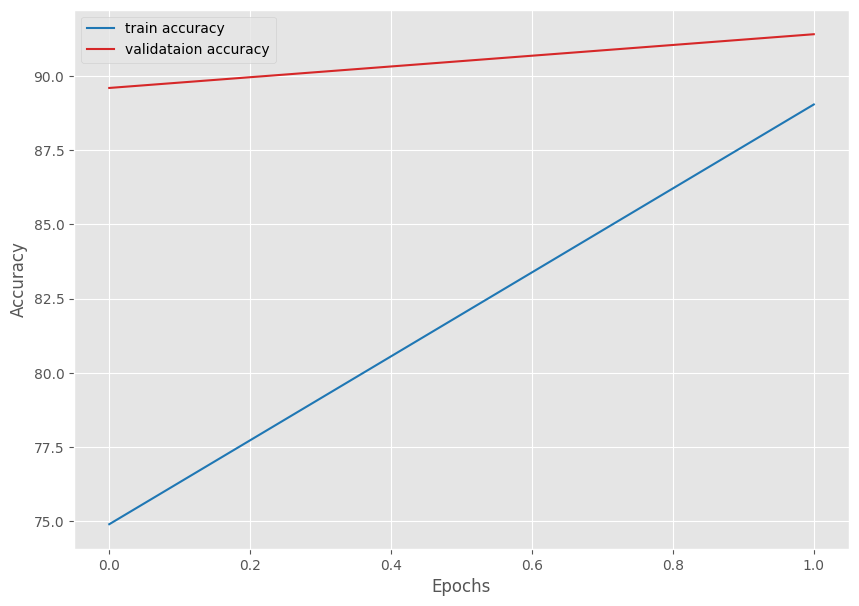

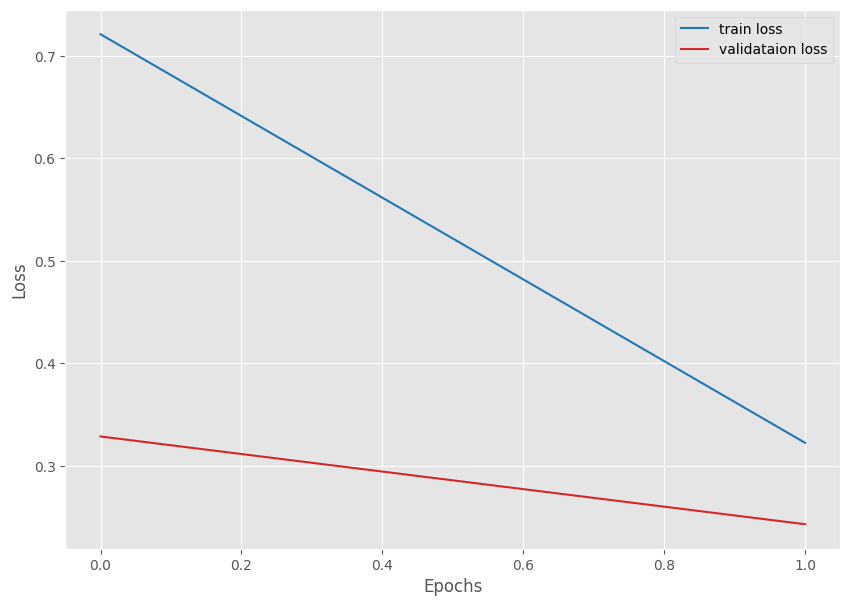

In [ ]:
# Save the trained model weights.
save_model(epochs, model, optimizer, criterion)
# Save the loss and accuracy plots.
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

## **PROBANDO EL MODELO ENTRENADO RESNET18**


---



In [ ]:
def test(model, testloader, device):
    import numpy as np
    model.eval()
    print('Testing model')
    predictions_list = []
    ground_truth_list = []
    test_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)

            # Forward pass.
            outputs = model(image)
            # Softmax probabilities.
            predictions = torch.softmax(outputs, dim=1).cpu().numpy()
            # Predicted class number.
            output_class = np.argmax(predictions)
            # Append the GT and predictions to the respective lists.
            predictions_list.append(output_class)
            ground_truth_list.append(labels.cpu().numpy())
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            test_running_correct += (preds == labels).sum().item()


    acc = 100. * (test_running_correct / len(testloader.dataset)) # porcentaje de predicciones correctas
    return acc

Cargamos el modelo entrenado dede la carpeta en la que fue guardado.

In [ ]:
out_path = '/content/drive/My Drive/descomprimido/'
checkpoint = torch.load(os.path.join(out_path , 'outputs', 'model.pth'))
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<ipython-input-56-4d25d533a3ea>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(out_path , 'outputs', 'model.pth'))


<All keys matched successfully>

Realizamos inferencias SOBRE TODO EL CONJUNTO DE PRUEBA.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=1)
acc = test(model, test_loader, device)
print(f"Test accuracy: {acc:.3f}%")

Testing model


  0%|          | 0/817 [00:00<?, ?it/s]

Test accuracy: 90.942%
